Text(0.5, 1.0, 'D2')

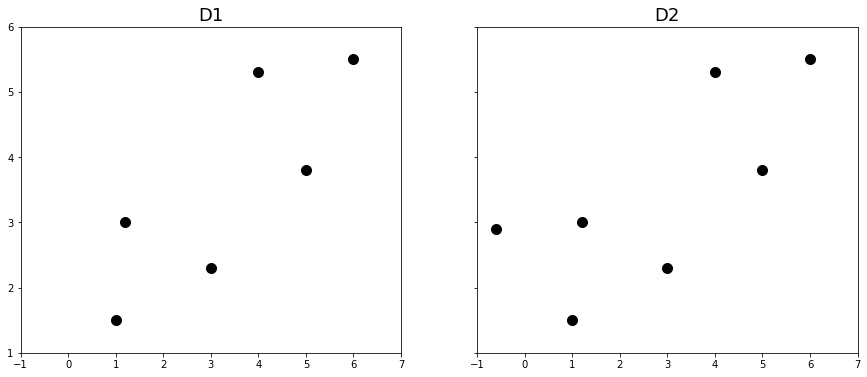

In [5]:
import numpy as np
import matplotlib.pyplot as plt

D1 = np.array([[1.0, 1.2, 3, 4, 5, 6],
              [1.5, 3, 2.3, 5.3, 3.8, 5.5]])
D2 = np.array([[-0.6, 1.0, 1.2, 3, 4, 5, 6],
              [2.9, 1.5, 3, 2.3, 5.3, 3.8, 5.5]])

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.set_title('D1', fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.set_title('D2', fontsize=18)

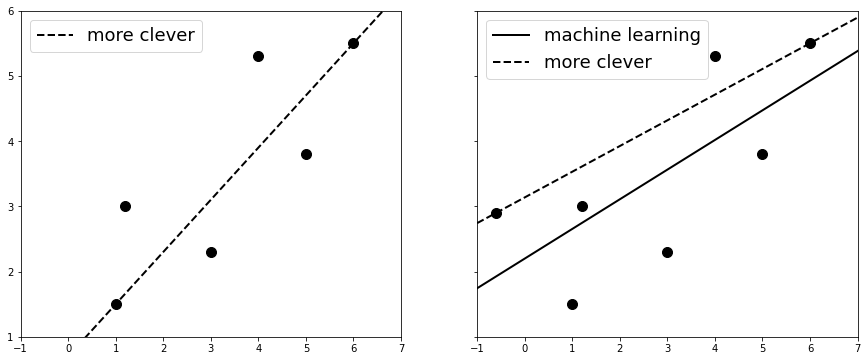

In [6]:
# 최적의 직선을 계산
# 선형회귀 알고리즘을 사용해 최적의 직선을 계산
def machine_learning(D):
    N = D.shape[1]
    X = np.c_[np.ones(N), D[0]]
    y = D[1]
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return w

# 첫 점과 끝 점을 잇는 방식으로 직선을 계산
def more_clever(D):
    first, last = D[:,0], D[:,-1]
    w1 = (last[1]-first[1]) / (last[0]-first[0])
    w0 = -w1 * first[0] + first[1]
    return (w0, w1)

# 직선을 그릴 때 사용
def f(x, w):
    return w[1]*x + w[0]


w_ml_d1 = machine_learning(D1)
w_mc_d1 = more_clever(D1)

w_ml_d2 = machine_learning(D2)
w_mc_d2 = more_clever(D2)

x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.plot(x, f(x, w_mc_d1), '--', c='k', lw=2, label='more clever')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10) # ❹
ax2.plot(x, f(x, w_ml_d2), c='k', lw=2, label='machine learning')
ax2.plot(x, f(x, w_mc_d2), '--', c='k', lw=2, label='more clever')
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.legend(fontsize=18)
plt.show()

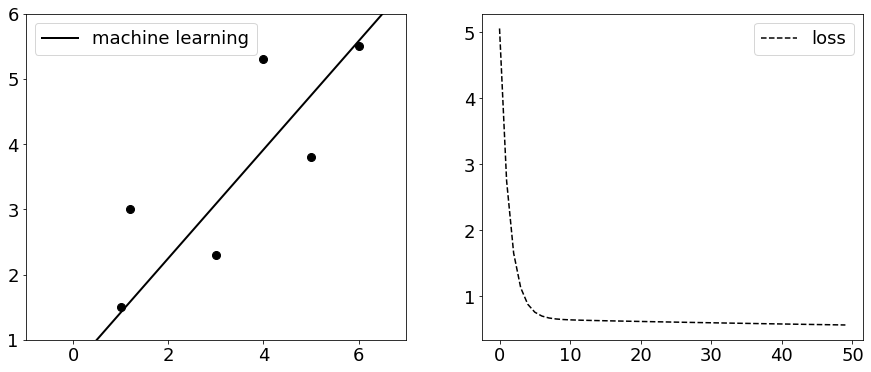

In [7]:
# 아래 코드는 선을 그리면서 점점 최적의 선을 찾아가는 과정을 150회 반복하는 것

import numpy as np
import matplotlib.pyplot as plt

num_iters = 150
alpha = 0.02

np.random.seed(2)
w = np.random.randn(2)
N = D1.shape[1] 

ws, L = [], []

# 1열에 1, 2열에 데이터의 x좌표를 가지는 행렬을 만듭니다.
# X: (N,2), y: (N,)
X = np.c_[np.ones(N), D1[0]]
y = D1[1]

# 여기서 우리의 경험 E를 반복하면서 태스크 T를 개선해 나간다.
for i in range(num_iters) :
    # grad L
    c = (1/N) * np.dot(X.T, np.dot(X, w) - y) 
    # 안전장치 grad L을 이용해서 w를 수정한다.
    w -= alpha * c 
    # w가 변화되는 과정을 저장해둔다.
    ws.append(w)
    
    # 손실을 계산한다.
    L.append( ((np.dot(X, w) - y)**2).sum()/(2*N) )

x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('', fontsize=25)
ax1.set_ylabel('', fontsize=25)
ax1.grid(False)
    
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('', fontsize=25)
ax2.set_ylabel('', fontsize=25)
ax2.grid(False)
    
ax1.plot(D1[0], D1[1], 'ko', markersize=8)
ax1.plot(x, f(x, w), c='k', lw=2, label='machine learning')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(L[:50], '--', c='k', label='loss')
ax2.legend(fontsize=18)
    
plt.show()

In [8]:
# 직접해보는 선형회귀
# https://metamath1.github.io/noviceml/linreg.html